# Classification - Mini-Project 2

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Farah Daoud

ID:49-4358

Tutorial:T-3

---

Name:Omar Ehab

ID:49-8426

Tutorial:T-3


---

Name:

ID:

Tutorial:

---


## Dataset Description

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

Each row represents a customer, and each column represents customer attributes as described below.

| Column | Description|
|-|-|
|gender|Whether the customer is a male or a female|
|SeniorCitizen| Whether the customer is a senior citizen or not (1, 0)|
|Partner|Whether the customer has a partner or not (Yes, No)|
|Dependents|Whether the customer has dependents or not (Yes, No)|
|tenure| Number of months the customer has stayed with the company|
|PhoneService|Whether the customer has a phone service or not (Yes, No)|
|MultipleLines|Whether the customer has multiple lines or not (Yes, No, No phone service*)|
|InternetService|Customer’s internet service provider (DSL, Fiber optic, No)|
|OnlineSecurity|Whether the customer has online security or not (Yes, No, No internet service**)|
|OnlineBackup|Whether the customer has online backup or not (Yes, No, No internet service)|
|DeviceProtection|Whether the customer has device protection or not (Yes, No, No internet service)|
|TechSupport|Whether the customer has tech support or not (Yes, No, No internet service)|
|StreamingTV|Whether the customer has streaming TV or not (Yes, No, No internet service) |
|StreamingMovies|Whether the customer has streaming movies or not (Yes, No, No internet service)|
|Contract|The contract term of the customer (Month-to-month, One year, Two year)|
|PaperlessBilling|Whether the customer has paperless billing or not (Yes, No)|
|PaymentMethod|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|MonthlyCharges|The amount charged to the customer monthly|
|TotalCharges|The total amount charged to the customer|
|Churn|Whether the customer churned or not (Yes or No)|

\* No phone service means the customer's plan does not include calling (could be a data-only plan)

\*\* No internet service means the customer's plan does not include internet/data and so the addon package does not apply

## Importing Libraries & Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2022/main/data/telecom_churn.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$29.85/m,$29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,$56.95/m,$1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,$53.85/m,$108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),$42.3/m,$1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$70.7/m,$151.65,Yes


## Data Inspection

In [ ]:
#getting data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        6976 non-null   object
 1   gender            7032 non-null   object
 2   SeniorCitizen     7032 non-null   int64 
 3   Partner           7032 non-null   object
 4   Dependents        7032 non-null   object
 5   tenure            7032 non-null   int64 
 6   PhoneService      7032 non-null   object
 7   MultipleLines     7032 non-null   object
 8   InternetService   7032 non-null   object
 9   OnlineSecurity    7032 non-null   object
 10  OnlineBackup      7032 non-null   object
 11  DeviceProtection  7032 non-null   object
 12  TechSupport       7032 non-null   object
 13  StreamingTV       7032 non-null   object
 14  StreamingMovies   7032 non-null   object
 15  Contract          7032 non-null   object
 16  PaperlessBilling  7032 non-null   object
 17  PaymentMethod 

## Data Cleaning

In [ ]:
#getting data types
df.dtypes

customerID          object
gender              object
SeniorCitizen        int64
Partner             object
Dependents          object
tenure               int64
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
MonthlyCharges      object
TotalCharges        object
Churn               object
dtype: object

In [ ]:
#finding null values
df.isnull().sum()

customerID           56
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges        852
Churn                 0
dtype: int64

In [ ]:
# Removing all he random characters, we only want the values from 0-9, and the + sign makes it loop
df['TotalCharges'] = df['TotalCharges'].str.extract('([0-9]+)', expand=False).astype(float)

In [ ]:
# Removing all he random characters, we only want the values from 0-9, and the + sign makes it loop
df['MonthlyCharges'] = df['MonthlyCharges'].str.extract('([0-9]+)', expand=False).astype(int)

In [ ]:
# Total Charges is monthly charges times tenure 
df['TotalCharges']=df['MonthlyCharges']*df['tenure']


In [ ]:
df.isnull().sum()
# As we can see below, we have eliminated the null values in the TotalCharges column

customerID          56
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges         0
Churn                0
dtype: int64

In [ ]:
# The data types have been updated after removing unneccessary characters from the MonthlyCharges and TotalCharges
df.dtypes

customerID          object
gender              object
SeniorCitizen        int64
Partner             object
Dependents          object
tenure               int64
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
MonthlyCharges       int64
TotalCharges         int64
Churn               object
dtype: object

In [ ]:
# We check the number of unique values in each column for our encoding process later on
df.nunique()

customerID          6976
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges        99
TotalCharges        2086
Churn                  2
dtype: int64

In [ ]:
# Display some descriptive statistics for numerical columns
pd.set_option("display.float_format", "{:.2f}".format)
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.00,7032.00,7032.00,7032.00
mean,0.16,32.42,64.33,2268.07
std,0.37,24.55,30.09,2255.47
min,0.00,1.00,18.00,18.00
25%,0.00,9.00,35.00,394.25
50%,0.00,29.00,70.00,1368.00
75%,0.00,55.00,89.00,3763.00
max,1.00,72.00,118.00,8496.00


## Exploratory Data Analysis

In [ ]:
# View the different unique values in each column
categorical_col = []
for column in df.columns:
    if df[column].dtype == object:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [ ]:
# We encode the churn column for 0 to represent have not churned and 1 to represent have churned
df['Churn'] = df['Churn'].astype('category').cat.codes
df['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int8

In [ ]:
# Drop the customerID column as it provides no useful information that would help us later on in modelling
df.drop(['customerID'], axis="columns", inplace=True)

In [ ]:
# Since most of the columns have a low number of unique values, then we can use dummy encoding on these columns.
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges        99
TotalCharges        2086
Churn                  2
dtype: int64

In [ ]:
# We implement the dummy encoding on all categorical columns that have a low number of unique values and are nominal. 
categorical_columns = ['Contract','PaymentMethod','gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df_encode = pd.get_dummies (data=df, columns=categorical_columns, drop_first=True, dtype='int8')
df_encode.head()

,tenure,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,1,29,29,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,34,56,1904,0,1,0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
2,2,53,106,1,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
3,45,42,1890,0,1,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
4,2,70,140,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


**Q1: What are the most correlated attributes with customer churn?**

**Visualization**

In [ ]:
# We get the correlations between all numerical columns first
corr = df_encode.corr()
corr

,tenure,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
tenure,1.00,0.25,0.82,-0.35,0.20,0.56,0.23,-0.21,-0.23,0.01,...,-0.04,0.36,-0.04,0.36,-0.04,0.33,-0.04,0.28,-0.04,0.29
MonthlyCharges,0.25,1.00,0.65,0.19,0.00,-0.07,0.03,0.27,-0.38,-0.01,...,-0.76,0.44,-0.76,0.48,-0.76,0.34,-0.76,0.63,-0.76,0.63
TotalCharges,0.82,0.65,1.00,-0.20,0.17,0.36,0.18,-0.06,-0.29,-0.00,...,-0.38,0.51,-0.38,0.52,-0.38,0.43,-0.38,0.52,-0.38,0.52
Churn,-0.35,0.19,-0.20,1.00,-0.18,-0.30,-0.13,0.30,-0.09,-0.01,...,-0.23,-0.08,-0.23,-0.07,-0.23,-0.16,-0.23,0.06,-0.23,0.06
Contract_One year,0.20,0.00,0.17,-0.18,1.00,-0.29,0.07,-0.11,0.00,0.01,...,0.04,0.08,0.04,0.10,0.04,0.10,0.04,0.06,0.04,0.06
Contract_Two year,0.56,-0.07,0.36,-0.30,-0.29,1.00,0.17,-0.28,-0.01,-0.00,...,0.22,0.11,0.22,0.17,0.22,0.24,0.22,0.07,0.22,0.08
PaymentMethod_Credit card (automatic),0.23,0.03,0.18,-0.13,0.07,0.17,1.00,-0.37,-0.29,0.00,...,0.00,0.09,0.00,0.11,0.00,0.12,0.00,0.04,0.00,0.05
PaymentMethod_Electronic check,-0.21,0.27,-0.06,0.30,-0.11,-0.28,-0.37,1.00,-0.39,0.00,...,-0.28,-0.00,-0.28,-0.00,-0.28,-0.11,-0.28,0.14,-0.28,0.14
PaymentMethod_Mailed check,-0.23,-0.38,-0.29,-0.09,0.00,-0.01,-0.29,-0.39,1.00,0.01,...,0.32,-0.17,0.32,-0.19,0.32,-0.08,0.32,-0.25,0.32,-0.25
gender_Male,0.01,-0.01,-0.00,-0.01,0.01,-0.00,0.00,0.00,0.01,1.00,...,0.00,-0.01,0.00,-0.00,0.00,-0.01,0.00,-0.01,0.00,-0.01


In [ ]:
# We are interested in the correlations with the churn column only and hence will get the correlations of all columns with the churn column and sort them in descending order 
corr['Churn'].sort_values(ascending=False)

Churn                                    1.00
InternetService_Fiber optic              0.31
PaymentMethod_Electronic check           0.30
MonthlyCharges                           0.19
PaperlessBilling_Yes                     0.19
SeniorCitizen_1                          0.15
StreamingTV_Yes                          0.06
StreamingMovies_Yes                      0.06
MultipleLines_Yes                        0.04
PhoneService_Yes                         0.01
gender_Male                             -0.01
MultipleLines_No phone service          -0.01
DeviceProtection_Yes                    -0.07
OnlineBackup_Yes                        -0.08
PaymentMethod_Mailed check              -0.09
PaymentMethod_Credit card (automatic)   -0.13
Partner_Yes                             -0.15
Dependents_Yes                          -0.16
TechSupport_Yes                         -0.16
OnlineSecurity_Yes                      -0.17
Contract_One year                       -0.18
TotalCharges                      

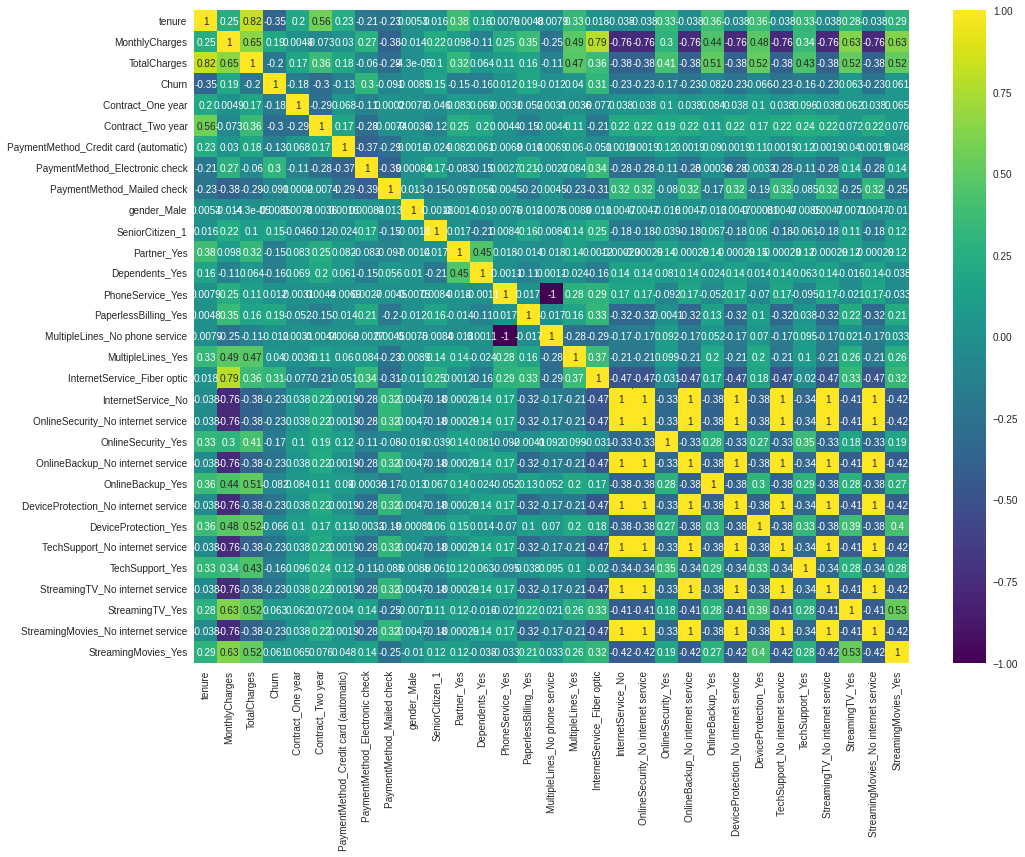

In [ ]:
# We also visualize these correlations
plt.figure(figsize=(16,12))
sns.heatmap(corr, cmap='viridis', annot = True);

**Answer for Q1**: The two most positively correlated columns with churn are InternetService_Fiber optic and PaymentMethod_Electronic check. On the other hand, the tqo most negatively correlated columns to churn are Contract_Two year and tenure.

**Q2: Which payment method has the highest churn rate?**

**Visualization**

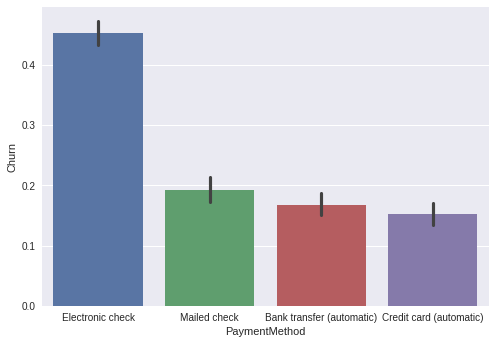

In [ ]:
#visualizing using a barplot
sns.barplot(data=df, x='PaymentMethod', y='Churn')
plt.show()

**Answer for Q2**: As seen from the above visualization, Electronic check is the payment method that has the highest churn rate

**Q3: After how many months do customers commonly churn?** (Hint: show and interpret the distribution)

**Visualization**

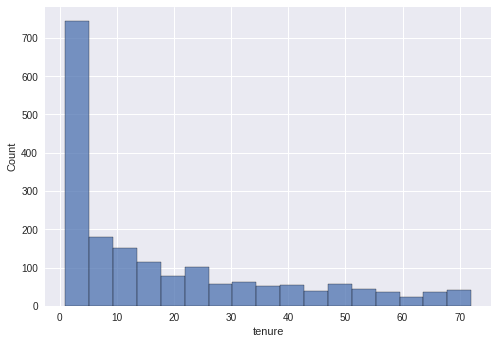

In [ ]:
#visualizing using a histogram
sns.histplot(x='tenure', data=df[df['Churn']==1])
plt.show()

**Answer for Q3**: Most customers churn during the first 5 to 10 months of being customers and as time goes on the churn rate of the customer decreases.

## Data Preparation for Modelling

In [ ]:
#splitting the data into training and test data
from sklearn.model_selection import train_test_split

X = df_encode.drop('Churn', axis=1)
y = df_encode['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Modelling

In [ ]:
#building the model using training data
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Tree Visualization

In [ ]:
#visualizing the tree
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(tree_clf, out_file=None,
                           feature_names=X.columns,
                           class_names=['No', 'Yes'],
                           filled=True, rounded=True,
                           special_characters=True) 
graph = graphviz.Source(dot_data)
graph
# alternatively, to export:
# graph.render('attrition')

## Evaluation

In [ ]:
#creating a helper function to aid us in the evaluation of the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
#displaying the evaluations on training and test data
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 98.82%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.985792     0.995246  0.988216     0.990519      0.988305
recall        0.998340     0.960245  0.988216     0.979292      0.988216
f1-score      0.992026     0.977432  0.988216     0.984729      0.988148
support    3614.000000  1308.000000  0.988216  4922.000000   4922.000000
_______________________________________________
Confusion Matrix: 
 [[3608    6]
 [  52 1256]]

Test Result:
Accuracy Score: 72.18%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.809923    0.476703  0.721801     0.643313      0.721327
recall        0.811491    0.474153  0.721801     0.642822      0.721801
f1-score      0.810706    0.475424  0.721801     0.643065      0.721563
support    1549.000000  561.000000  

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


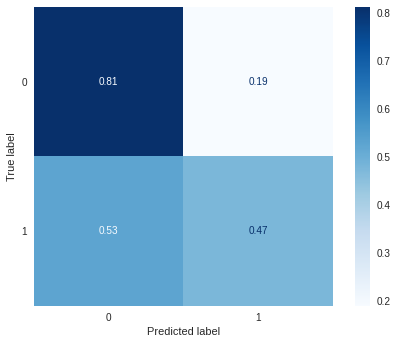

In [ ]:
# We visualize the confusion matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(tree_clf, X_test, y_test, cmap='Blues', normalize='true')
plt.grid(False)


In [ ]:
#displaying other valuable evaluation metrics
from sklearn.metrics import f1_score, precision_score, recall_score

pred = tree_clf.predict(X_test)

print('Precision: ',precision_score(y_test,pred))
print('=======================================')
print('Recall: ',recall_score(y_test,pred))
print('=======================================')
print('F1_score: ',f1_score(y_test,pred))

Precision:  0.4767025089605735
Recall:  0.4741532976827095
F1_score:  0.47542448614834676


 Conclusion:
 After using the tree classifier algorithim to build a classification model, we find that it accurately predicts 72.18% of the test data which signifies its strength in classifying any future observations. The other evaluation metrics are also adequate and verify that our classifier is to be valuable to predict future customer churn rates.

## Bonus (Optional)